In [14]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
#Load The Data Set
df = pd.read_csv('homes.csv')
print(df.to_string()) 

    Sell   "List"   "Living"   "Rooms"   "Beds"   "Baths"   "Age"   "Acres"   "Taxes"
0    142      160         28        10        5         3      60      0.28      3167
1    175      180         18         8        4         1      12      0.43      4033
2    129      132         13         6        3         1      41      0.33      1471
3    138      140         17         7        3         1      22      0.46      3204
4    232      240         25         8        4         3       5      2.05      3613
5    135      140         18         7        4         3       9      0.57      3028
6    150      160         20         8        4         3      18      4.00      3131
7    207      225         22         8        4         2      16      2.22      5158
8    271      285         30        10        5         2      30      0.53      5702
9     89       90         10         5        3         1      43      0.30      2054
10   153      157         22         8        3       

In [16]:
df.describe()

,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,170.360000,178.340000,21.120000,8.060000,3.820000,1.860000,30.220000,1.020600,3706.100000
std,72.755885,79.382723,8.351072,1.284285,0.690755,0.756199,30.962314,1.191496,1579.915268
min,87.000000,90.000000,10.000000,5.000000,3.000000,1.000000,2.000000,0.220000,1445.000000
25%,135.000000,140.000000,17.000000,7.000000,3.000000,1.000000,12.250000,0.382500,3107.000000
50%,152.000000,160.000000,20.000000,8.000000,4.000000,2.000000,24.500000,0.550000,3490.000000
75%,182.250000,190.000000,22.750000,9.000000,4.000000,2.000000,37.000000,1.182500,3919.250000
max,567.000000,625.000000,64.000000,12.000000,6.000000,4.000000,202.000000,6.490000,12192.000000


Data Set Description: Information about 50 home sales
Sell: Selling price in thousands of dollars.
List: Listing price in thousands of dollars.
Living: Size of the living area in square feet.
Rooms: Number of rooms.
Beds: Number of bedrooms.
Baths: Number of bathrooms.
Age: Age of the home in years.
Acres: Size of the lot in acres.
Taxes: Annual property taxes in dollars.

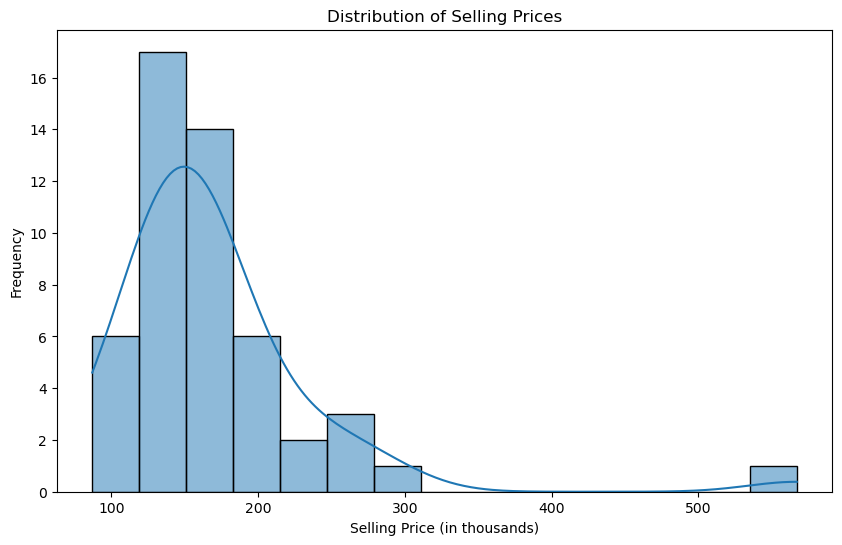

In [17]:
# Clean up column names if necessary
df.columns = df.columns.str.strip().str.replace('"', '')

# EDA Techniques
# Distribution of Selling Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Sell'], kde=True, bins=15)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price (in thousands)')
plt.ylabel('Frequency')
plt.show()

To understand the relationships between different variables, especially how they relate to the selling price.

The histogram of selling prices shows that most homes are sold in the lower price range, with a peak around $150k. There are a few outliers on the higher end, indicating some homes are sold at significantly higher prices than the majority.


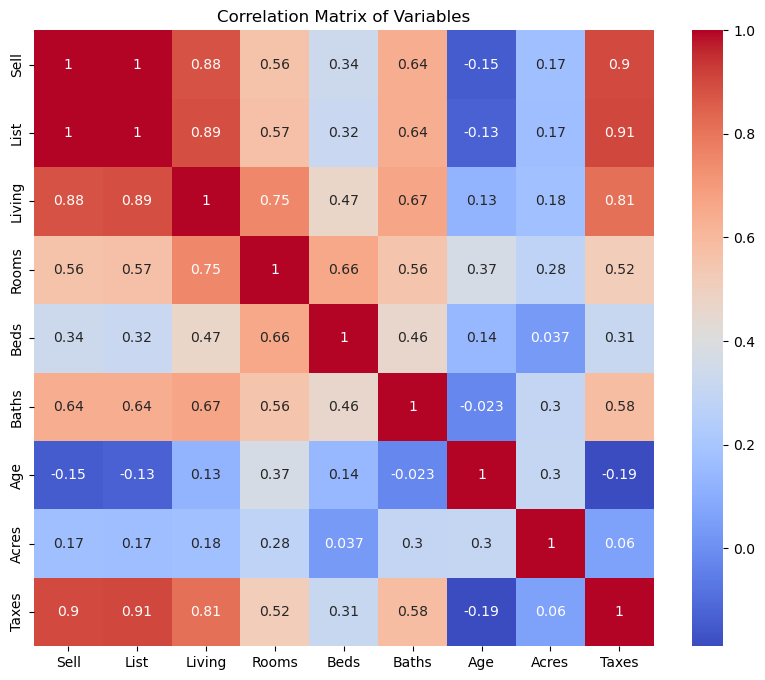

In [18]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()

The correlation matrix reveals several key insights: There's a very high correlation between Sell and List prices (0.997), which is expected as they are both directly related to the property's market value. Sell price has a strong positive correlation with Living area (0.879) and Taxes (0.899), indicating that larger homes and higher taxes are associated with higher selling prices


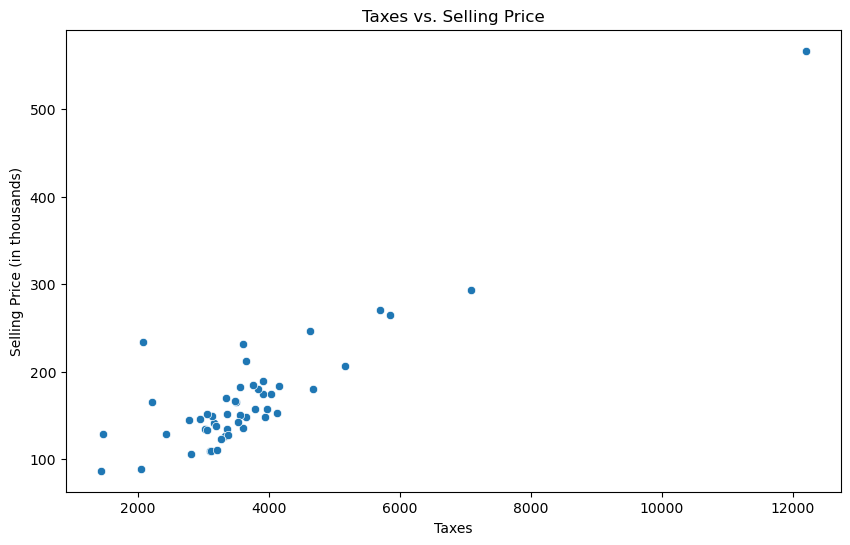

In [19]:
# Scatter plot of Taxes vs. Selling Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Taxes', y='Sell')
plt.title('Taxes vs. Selling Price')
plt.xlabel('Taxes')
plt.ylabel('Selling Price (in thousands)')
plt.show()

Examining the relationship between Taxes and Sell prices to better understand how property taxes might predict selling prices. Additionally, we will examine another variable's relationship with Sell prices to identify potential predictors.

The scatter plots reveal:

Taxes vs. Selling Price: There appears to be a positive linear relationship between property taxes and selling prices, indicating that as taxes increase, selling prices tend to increase as well. This relationship, while showing some spread, suggests that taxes could be a strong predictor of selling price.

Living Area vs. Selling Price: Similarly, there is a positive relationship between the living area of a home and its selling price. Homes with larger living areas tend to sell at higher prices. This relationship also appears to be linear, with some variability in prices, especially for larger homes.

In [26]:
X_taxes = df[["Taxes"]]  
X_living = df[["Living"]]  
y = df["Sell"] 

# Taxes model
X_train_taxes, X_test_taxes, y_train, y_test = train_test_split(X_taxes, y, test_size=0.2, random_state=42)
lr_model_taxes = LinearRegression()
lr_model_taxes.fit(X_train_taxes, y_train)
y_pred_taxes = lr_model_taxes.predict(X_test_taxes)
r2_taxes = r2_score(y_test, y_pred_taxes)
mse_taxes = mean_squared_error(y_test, y_pred_taxes)

print("Taxes Model Summary:")
print(f"R-squared: {r2_taxes}, MSE: {mse_taxes}, Coefficient: {lr_model_taxes.coef_[0]}, Intercept: {lr_model_taxes.intercept_}")


Taxes Model Summary:
R-squared: -0.31345448569316803, MSE: 751.2434276370644, Coefficient: 0.04089929922400107, Intercept: 22.854338363987353


Taxes Model: The negative R-squared value (-0.313454) indicates a poor fit for the model, with property taxes predicting selling prices. The coefficient of 0.040899 suggests that for every $1,000 increase in taxes, the selling price increases by approximately $40.9k. The intercept of 22.854338 indicates the base selling price when taxes are $0.

In [28]:
# Living area model
X_train_living, X_test_living, y_train_living, y_test_living = train_test_split(X_living, y, test_size=0.2, random_state=42)
lr_model_living = LinearRegression()
lr_model_living.fit(X_train_living, y_train_living)
y_pred_living = lr_model_living.predict(X_test_living)
r2_living = r2_score(y_test_living, y_pred_living)
mse_living = mean_squared_error(y_test_living, y_pred_living)

print("\nLiving Area Model Summary:")
print(f"R-squared: {r2_living}, MSE: {mse_living}, Coefficient: {lr_model_living.coef_[0]}, Intercept: {lr_model_living.intercept_}")



Living Area Model Summary:
R-squared: -0.46415796521627617, MSE: 837.4397897851013, Coefficient: 7.8067397806580265, Intercept: 5.425882352941159


Living Area Model: Similar to the taxes model, the negative R-squared value (-0.464158) indicates a poor fit. The coefficient of 7.806740 implies that for every additional square foot in living area, the selling price increases by approximately $7.8k. The intercept of 5.425882 represents the base selling price for a home with 0 square feet of living area.

The negative R-squared values for both models indicate a poor fit, suggesting that selling prices cannot be accurately predicted by taxes or living area alone. This highlights the complexity of real estate pricing and the potential need for more sophisticated models that incorporate multiple factors to improve predictive accuracy.